### Importing useful packages and loading BindingDB dataset:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import requests
import re
import lxml
from bs4 import BeautifulSoup
import sys
import os
import json

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [4]:
BINDING_DATASET = "BindingDB_All.tsv"

In [5]:
# Only loading columns of interest for this part :
usecols = [
    # 'BindingDB Reactant_set_id',
    # 'Ligand SMILES',
    # 'Ligand InChI',
    # 'Ligand InChI Key',
    # 'BindingDB MonomerID',
    "BindingDB Ligand Name",
    "Target Name",
    "Target Source Organism According to Curator or DataSource",
    #'Ki (nM)',
    #'IC50 (nM)',
    #'Kd (nM)',
    #'EC50 (nM)',
    #'kon (M-1-s-1)',
    #'koff (s-1)',
    # 'pH',
    # 'Temp (C)',
    # "Curation/DataSource",
    "Article DOI",
    # 'BindingDB Entry DOI',
    # 'PMID',
    # 'PubChem AID',
    "Patent Number",
    # "Authors",
    # "Institution",
    # 'Link to Ligand in BindingDB',
    # 'Link to Target in BindingDB',
    # 'Link to Ligand-Target Pair in BindingDB',
    # 'Ligand HET ID in PDB',
    # 'PDB ID(s) for Ligand-Target Complex',
    # 'PubChem CID',
    # 'PubChem SID',
    #'ChEBI ID of Ligand',
    #'ChEMBL ID of Ligand',
    #'DrugBank ID of Ligand',
    #'IUPHAR_GRAC ID of Ligand',
    #'KEGG ID of Ligand',
    #'ZINC ID of Ligand',
    # 'Number of Protein Chains in Target (>1 implies a multichain complex)',
    # 'BindingDB Target Chain Sequence',
    # 'PDB ID(s) of Target Chain',
    # 'UniProt (SwissProt) Recommended Name of Target Chain',
    # 'UniProt (SwissProt) Entry Name of Target Chain',
    "UniProt (SwissProt) Primary ID of Target Chain",
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain',
    # 'UniProt (TrEMBL) Entry Name of Target Chain',
    #'UniProt (TrEMBL) Primary ID of Target Chain',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain',
    # 'BindingDB Target Chain Sequence.1',
    # 'PDB ID(s) of Target Chain.1',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.1',
    # 'UniProt (SwissProt) Entry Name of Target Chain.1',
    # 'UniProt (SwissProt) Primary ID of Target Chain.1',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.1',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.1',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.1',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.1',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.1',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.1',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.1',
    # 'BindingDB Target Chain Sequence.2',
    # 'PDB ID(s) of Target Chain.2',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.2',
    # 'UniProt (SwissProt) Entry Name of Target Chain.2',
    # 'UniProt (SwissProt) Primary ID of Target Chain.2',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.2',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.2',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.2',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.2',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.2',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.2',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.2',
    # 'BindingDB Target Chain Sequence.3',
    # 'PDB ID(s) of Target Chain.3',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.3',
    # 'UniProt (SwissProt) Entry Name of Target Chain.3',
    # 'UniProt (SwissProt) Primary ID of Target Chain.3',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.3',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.3',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.3',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.3',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.3',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.3',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.3',
    # 'BindingDB Target Chain Sequence.4',
    # 'PDB ID(s) of Target Chain.4',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.4',
    # 'UniProt (SwissProt) Entry Name of Target Chain.4',
    # 'UniProt (SwissProt) Primary ID of Target Chain.4',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.4',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.4',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.4',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.4',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.4',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.4',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.4',
    # 'BindingDB Target Chain Sequence.5',
    # 'PDB ID(s) of Target Chain.5',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.5',
    # 'UniProt (SwissProt) Entry Name of Target Chain.5',
    # 'UniProt (SwissProt) Primary ID of Target Chain.5',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.5',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.5',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.5',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.5',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.5',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.5',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.5',
    # 'BindingDB Target Chain Sequence.6',
    # 'PDB ID(s) of Target Chain.6',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.6',
    # 'UniProt (SwissProt) Entry Name of Target Chain.6',
    # 'UniProt (SwissProt) Primary ID of Target Chain.6',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.6',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.6',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.6',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.6',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.6',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.6',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.6',
    # 'BindingDB Target Chain Sequence.7',
    # 'PDB ID(s) of Target Chain.7',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.7',
    # 'UniProt (SwissProt) Entry Name of Target Chain.7',
    # 'UniProt (SwissProt) Primary ID of Target Chain.7',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.7',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.7',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.7',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.7',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.7',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.7',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.7',
    # 'BindingDB Target Chain Sequence.8',
    # 'PDB ID(s) of Target Chain.8',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.8',
    # 'UniProt (SwissProt) Entry Name of Target Chain.8',
    # 'UniProt (SwissProt) Primary ID of Target Chain.8',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.8',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.8',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.8',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.8',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.8',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.8',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.8',
    # 'BindingDB Target Chain Sequence.9',
    # 'PDB ID(s) of Target Chain.9',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.9',
    # 'UniProt (SwissProt) Entry Name of Target Chain.9',
    # 'UniProt (SwissProt) Primary ID of Target Chain.9',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.9',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.9',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.9',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.9',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.9',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.9',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.9',
    # 'BindingDB Target Chain Sequence.10',
    # 'PDB ID(s) of Target Chain.10',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.10',
    # 'UniProt (SwissProt) Entry Name of Target Chain.10',
    # 'UniProt (SwissProt) Primary ID of Target Chain.10',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.10',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.10',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.10',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.10',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.10',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.10',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.10',
    # 'BindingDB Target Chain Sequence.11',
    # 'PDB ID(s) of Target Chain.11',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.11',
    # 'UniProt (SwissProt) Entry Name of Target Chain.11',
    # 'UniProt (SwissProt) Primary ID of Target Chain.11',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.11',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.11',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.11',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.11',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.11',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.11',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.11',
    # 'BindingDB Target Chain Sequence.12',
    # 'PDB ID(s) of Target Chain.12',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.12',
    # 'UniProt (SwissProt) Entry Name of Target Chain.12',
    # 'UniProt (SwissProt) Primary ID of Target Chain.12',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.12',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.12',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.12',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.12',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.12',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.12',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.12'
]

In [6]:
bindingDB = pd.read_csv(BINDING_DATASET, sep="\t", on_bad_lines="skip", usecols=usecols)

### Investigating citations from Article DOI:

#### On all dataset:

In [48]:
doi = bindingDB["Article DOI"].value_counts()
unique_doi_ordered = doi.index.tolist()

In [100]:
from src.scripts.citations import get_citations

In [ ]:
# citations = []
# for doi in unique_doi_ordered:
#     citation = get_citations(doi)
#     citations.append({"doi": doi, "citation": citation})
# with open("citations.json", "w") as f:
#     json.dump(citations, f)

Error: 404
Error: 404
Error: 404
Error: 404
Error: 404
Error: 404
Error: 404
Error: 404
Error: 404
Error: 404
Error: 404
Error: 404


In [109]:
with open("../src/data/citations.json", "r") as f:
    citations = json.load(f)

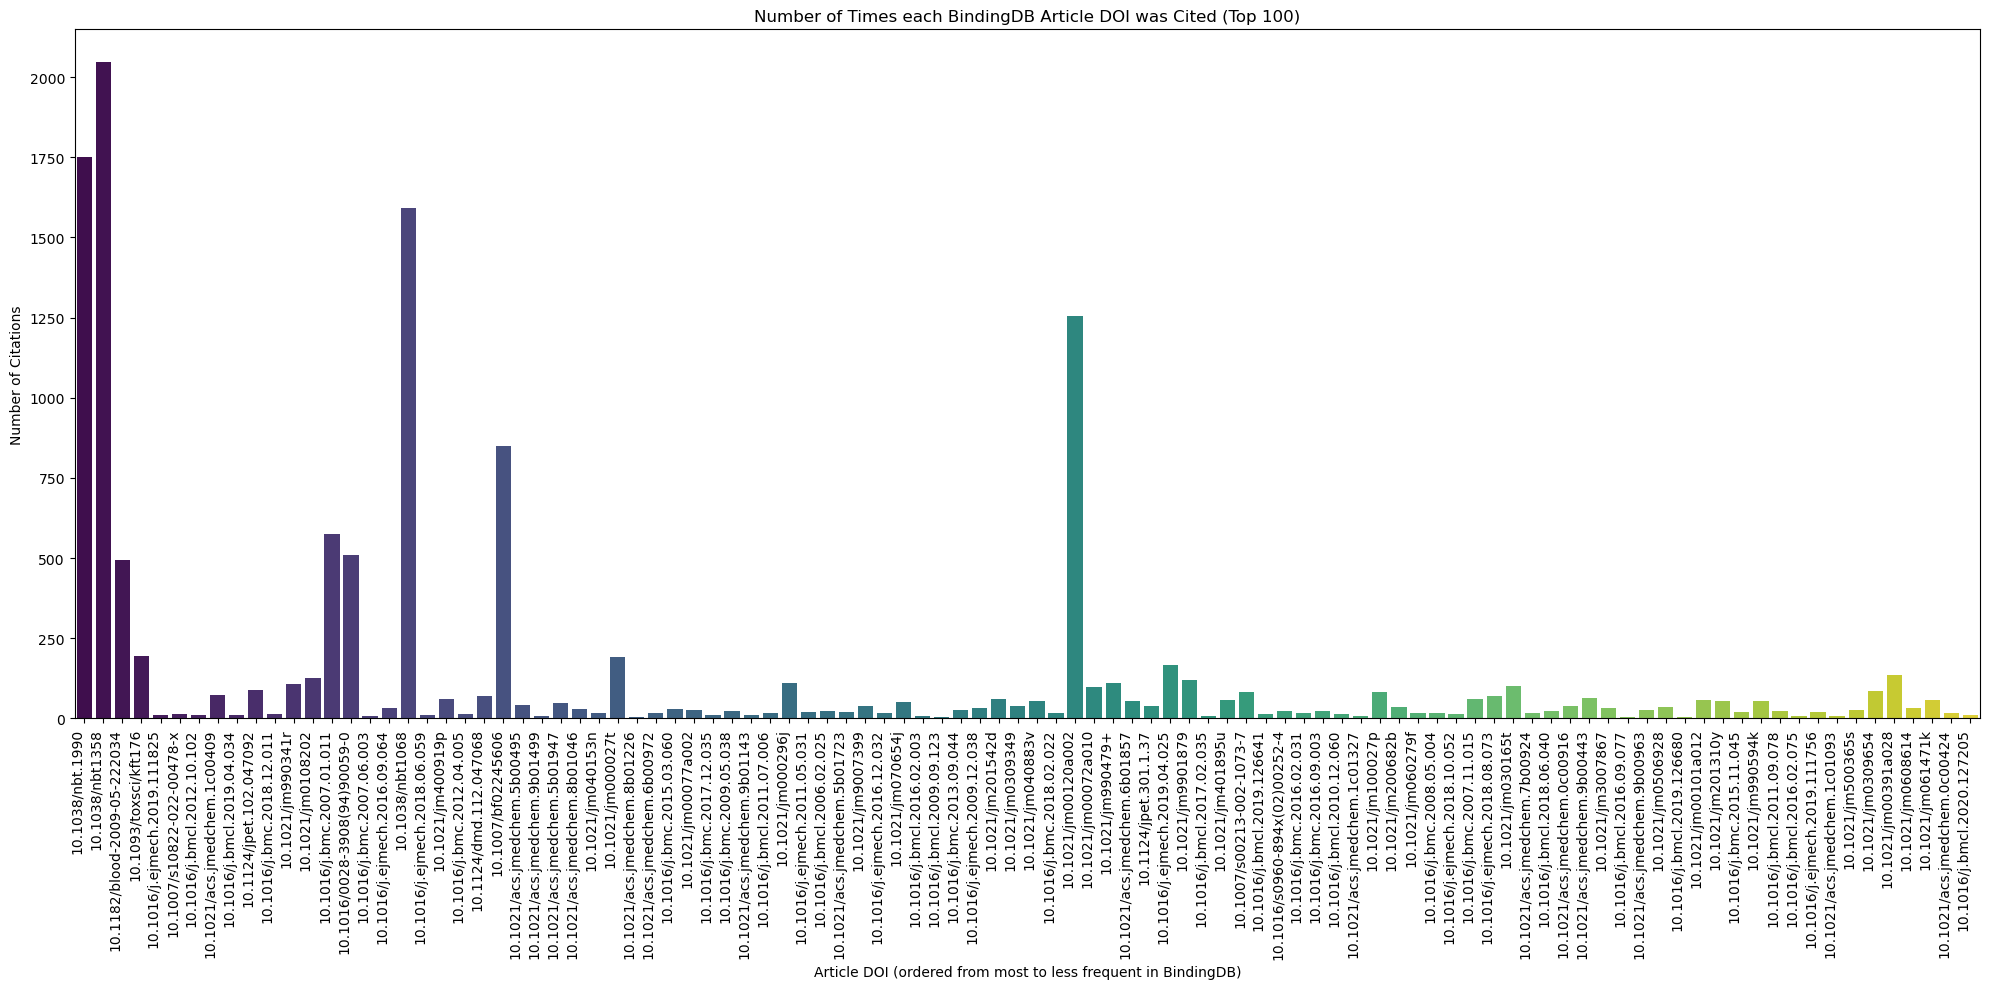

In [111]:
citations_df = pd.DataFrame(citations[0:100])
plt.figure(figsize=(20, 10))
sns.barplot(x="doi", y="citation", data=citations_df, palette="viridis")
plt.xticks(rotation=90, ha="right")
plt.xlabel("Article DOI (ordered from most to less frequent in BindingDB)")
plt.ylabel("Number of Citations")
plt.title("Number of Times each BindingDB Article DOI was Cited (Top 100)")
plt.tight_layout()
plt.show()

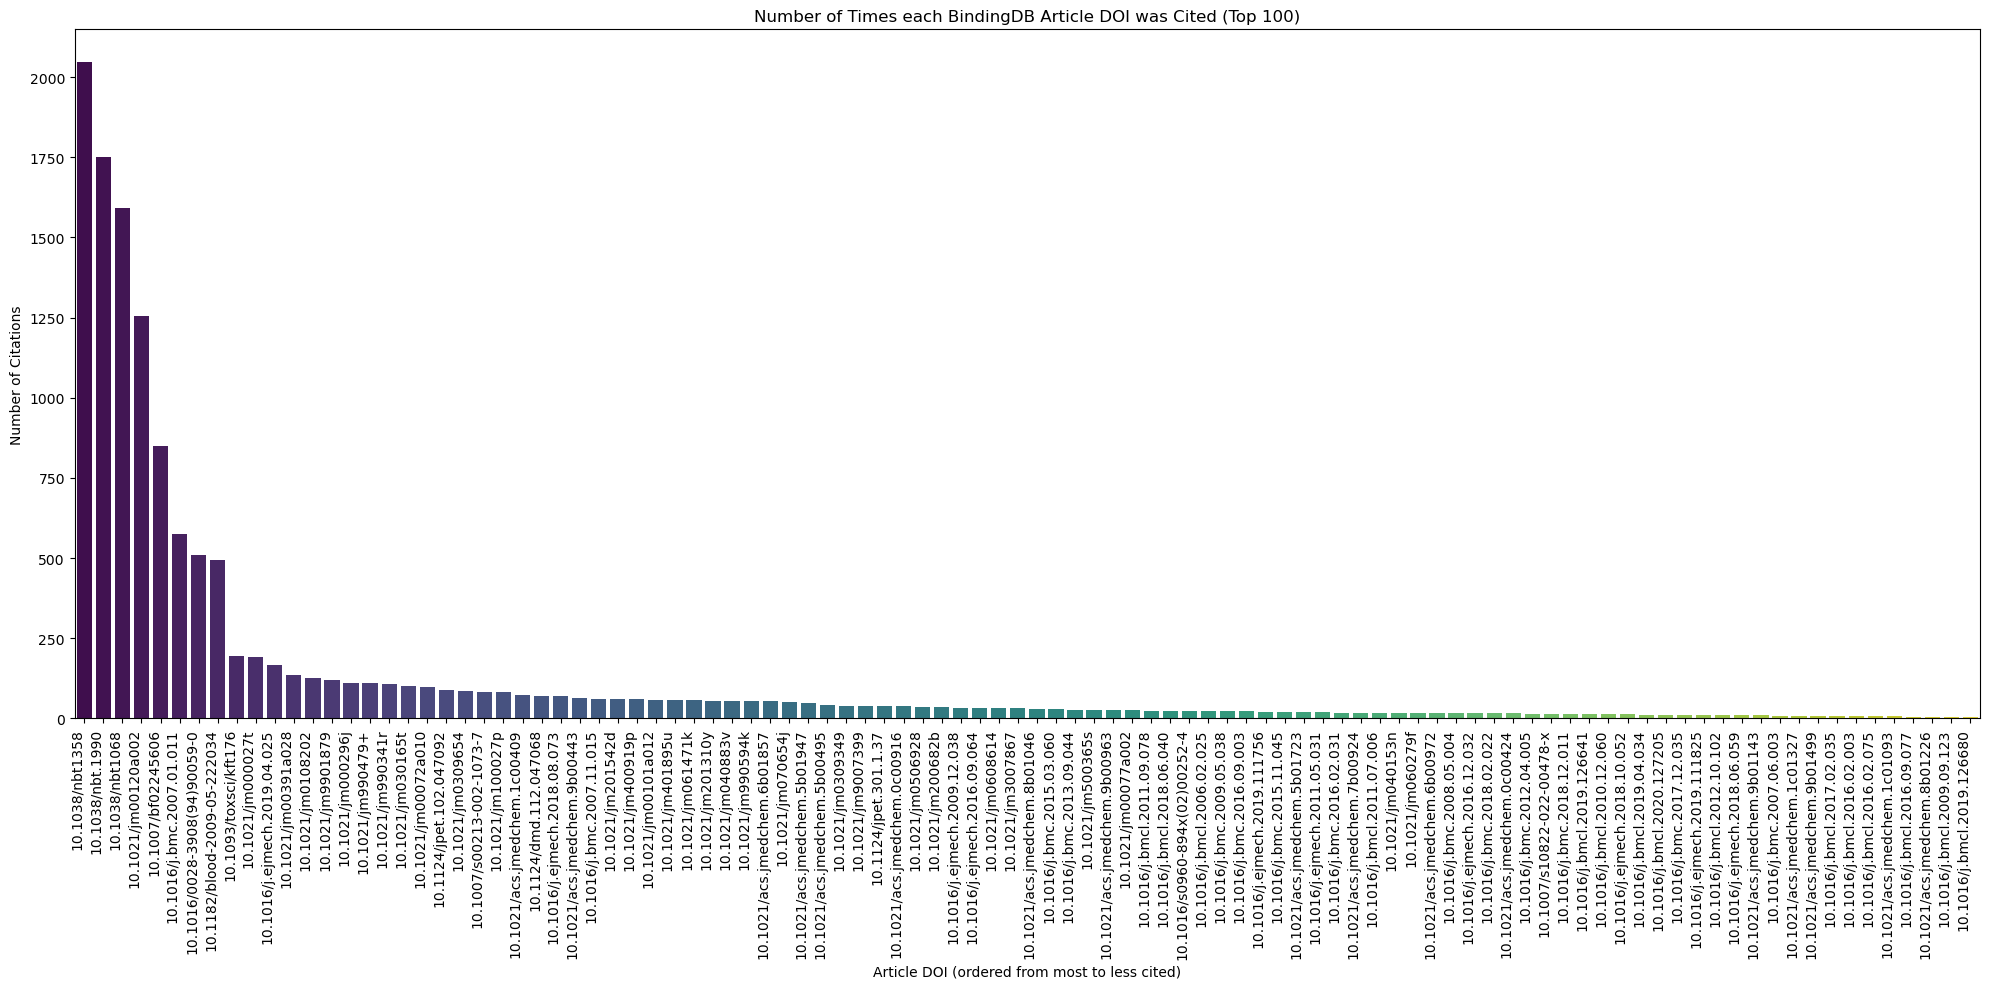

In [112]:
citations_df = pd.DataFrame(citations[0:100])
citations_df = citations_df.sort_values(by="citation", ascending=False)
plt.figure(figsize=(20, 10))
sns.barplot(x="doi", y="citation", data=citations_df, palette="viridis")
plt.xticks(rotation=90, ha="right")
plt.xlabel("Article DOI (ordered from most to less cited)")
plt.ylabel("Number of Citations")
plt.title("Number of Times each BindingDB Article DOI was Cited (Top 100)")
plt.tight_layout()
plt.show()

#### Depending on Diseases:

In [ ]:
from src.scripts.disease_plotting import load_uniprotid_diseases

file_path = "../src/data/UniprotID_disases.json"
absolute_path = os.path.abspath(file_path)
disease_data = load_uniprotid_diseases(absolute_path)

In [8]:
from src.scripts.disease_plotting import add_keywords_when_comments_missing

disease_data = add_keywords_when_comments_missing(disease_data)

In [9]:
from src.scripts.disease_plotting import weigh_each_comment

disease_data = weigh_each_comment(bindingDB, disease_data)

In [34]:
# from src.scripts.disease_plotting import merge_and_explode_comments
from src.scripts.disease_plotting import sort_diseases

# diseases = merge_and_explode_comments(bindingDB,disease_data)
# diseases = (
#         bindingDB.merge(disease_data, how="inner")
#         .dropna(subset="comments_bfill")
#         .explode("comments_bfill")["comments_bfill"]
#         .to_frame()
#     )
# diseases["Disease Classes"] = diseases["comments_bfill"].apply(sort_diseases)

diseases = (
    bindingDB.merge(
        disease_data[
            ["UniProt (SwissProt) Primary ID of Target Chain", "comments_bfill"]
        ],
        how="inner",
    )
    .dropna(subset="comments_bfill")
    .explode("comments_bfill")[
        ["UniProt (SwissProt) Primary ID of Target Chain", "comments_bfill"]
    ]
)
diseases["Disease Classes"] = diseases["comments_bfill"].apply(sort_diseases)

In [36]:
disease_uniprot_mapping = (
    diseases.groupby("Disease Classes")[
        "UniProt (SwissProt) Primary ID of Target Chain"
    ]
    .apply(list)
    .reset_index()
)
disease_uniprot_mapping[
    "UniProt (SwissProt) Primary ID of Target Chain"
] = disease_uniprot_mapping["UniProt (SwissProt) Primary ID of Target Chain"].apply(
    lambda x: list(set(x))
)
disease_uniprot_mapping

,Disease Classes,UniProt (SwissProt) Primary ID of Target Chain
0,3MC syndrome 1,[P48740]
1,"46,XX sex reversal 4",[Q13285]
2,"46,XY sex reversal 3",[Q13285]
3,"46,XY sex reversal 5",[Q14781]
4,"46,XY sex reversal 6",[Q13233]
...,...,...
1668,Yao syndrome,[Q9HC29]
1669,Zimmermann-Laband syndrome 1,[O95259]
1670,Zimmermann-Laband syndrome 2,[P21281]
1671,Zimmermann-Laband syndrome 3,[Q9UGI6]


In [ ]:
disease_uniprot_mapping_exploded = disease_uniprot_mapping.explode(
    "UniProt (SwissProt) Primary ID of Target Chain"
)
bindingDB = bindingDB.dropna(subset=["Article DOI"])
merged_data = bindingDB.merge(
    disease_uniprot_mapping_exploded[
        ["Disease Classes", "UniProt (SwissProt) Primary ID of Target Chain"]
    ],
    how="inner",
    on="UniProt (SwissProt) Primary ID of Target Chain",
)
disease_dois = (
    merged_data.groupby("Disease Classes")["Article DOI"].apply(list).reset_index()
)
disease_dois["Article DOI"] = disease_dois["Article DOI"].apply(lambda x: list(set(x)))
disease_dois

,Disease Classes,Article DOI
0,3MC syndrome 1,[10.1021/acs.jmedchem.7b00882]
1,"46,XX sex reversal 4","[10.1016/j.bmcl.2008.03.027, 10.1021/acsmedche..."
2,"46,XY sex reversal 3","[10.1016/j.bmcl.2008.03.027, 10.1021/acsmedche..."
3,"46,XY sex reversal 5","[10.1021/acsmedchemlett.5b00378, 10.1016/j.bmc..."
4,"46,XY sex reversal 6","[10.1021/jm050165o, 10.1016/j.bmcl.2012.05.090..."
...,...,...
1668,Yao syndrome,"[10.1016/j.ejmech.2020.112723, 10.1016/j.ejmec..."
1669,Zimmermann-Laband syndrome 1,[10.1021/acsmedchemlett.9b00181]
1670,Zimmermann-Laband syndrome 2,[10.1021/jm900277z]
1671,Zimmermann-Laband syndrome 3,"[10.1016/j.bmcl.2008.08.026, 10.1016/j.ejmech...."


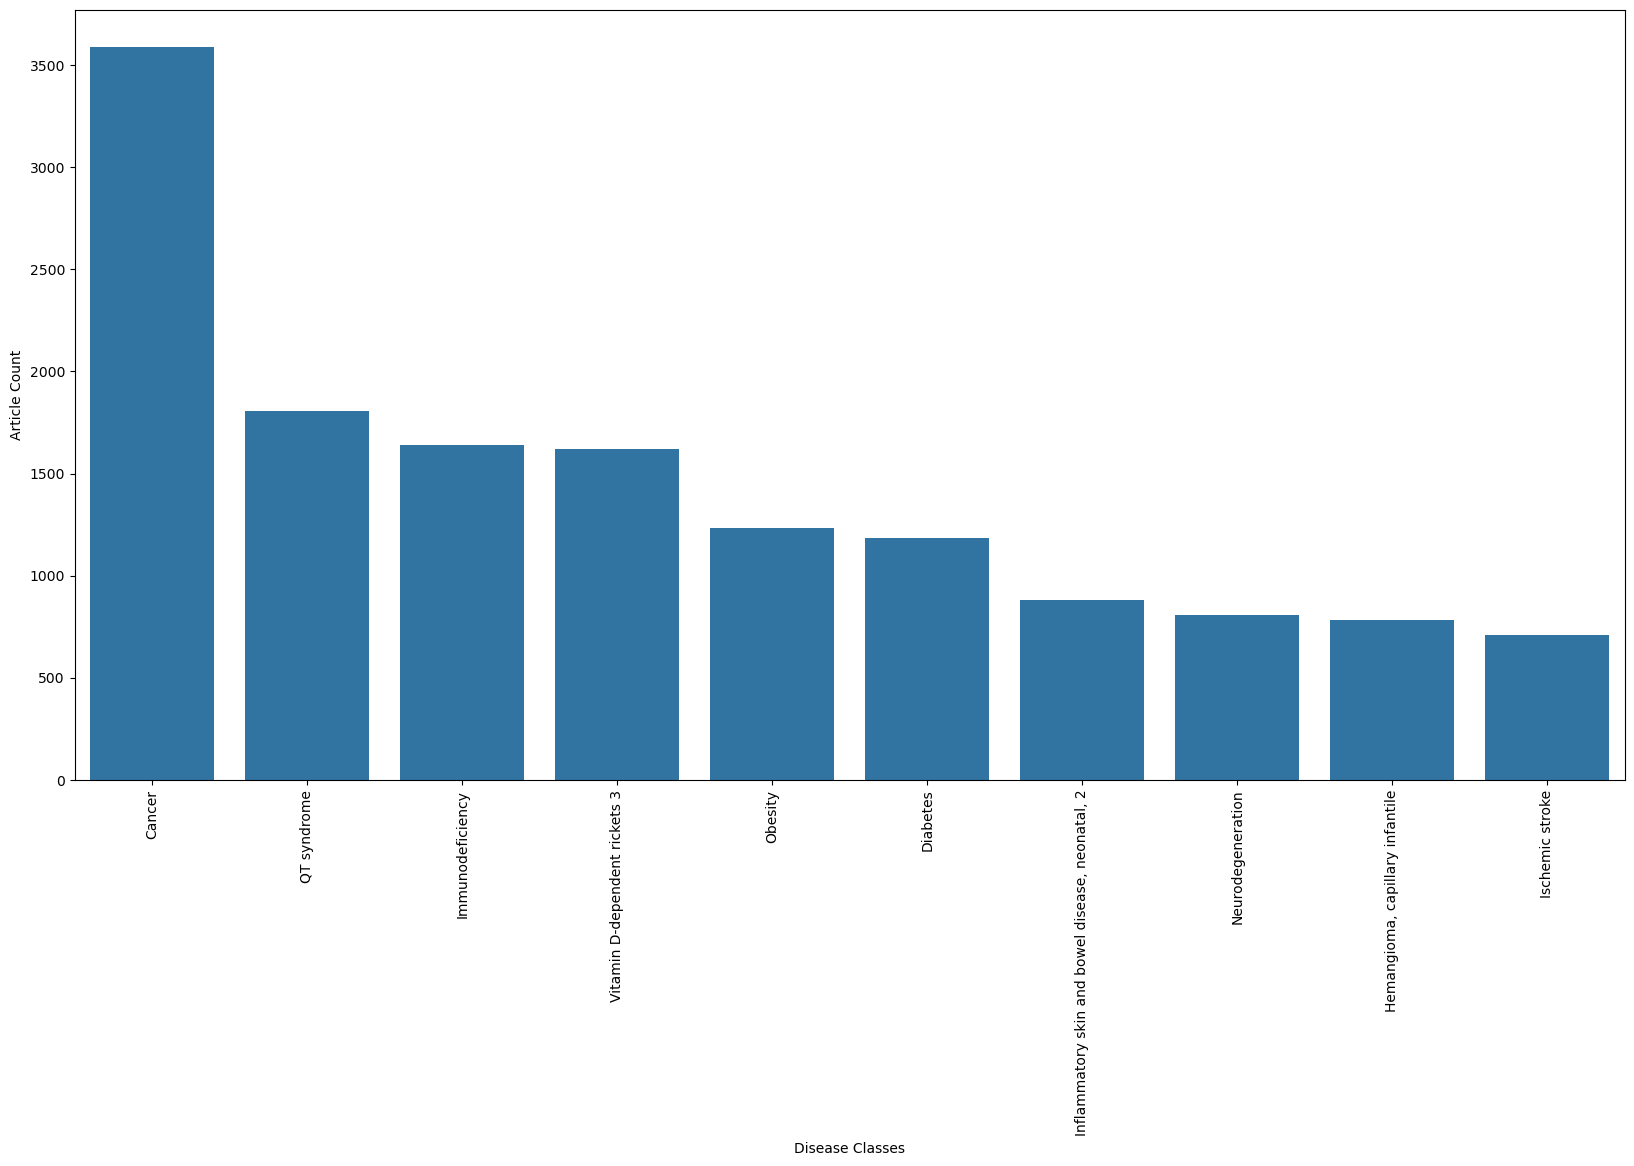

In [47]:
disease_dois["Article Count"] = disease_dois["Article DOI"].apply(len)
disease_dois = disease_dois.sort_values(by="Article Count", ascending=False)
plt.figure(figsize=(20, 10))
sns.barplot(data=disease_dois[0:10], x="Disease Classes", y="Article Count")
plt.xticks(rotation=90)
plt.show()

In [116]:
citations_dict = {item["doi"]: item["citation"] for item in citations}
disease_citations = []
for index, row in disease_dois.iterrows():
    disease_class = row["Disease Classes"]
    dois = row["Article DOI"]
    total_citations = 0
    for doi in dois:
        citation_count = citations_dict.get(doi, 0)  # 0 if DOI not found
        if citation_count != None:
            total_citations += citation_count
    disease_citations.append(
        {"Disease Classes": disease_class, "Total Citations": total_citations}
    )
disease_citations_df = pd.DataFrame(disease_citations)

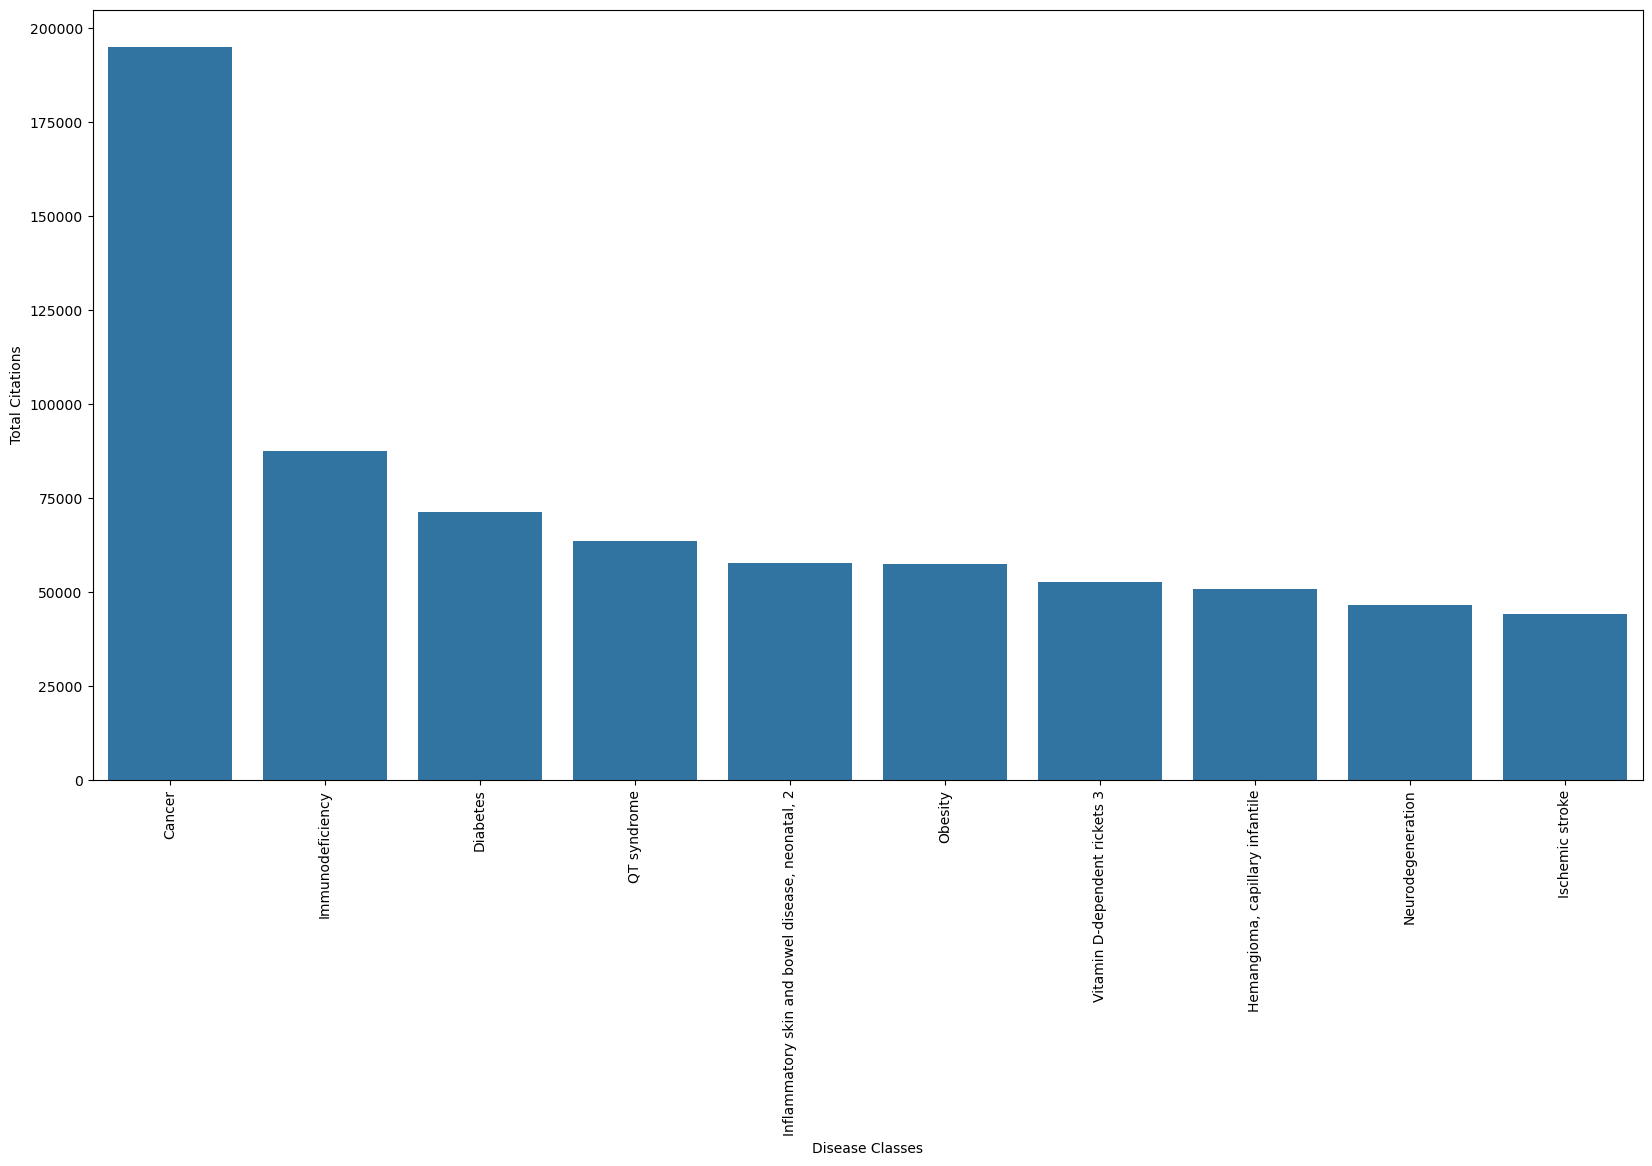

In [ ]:
disease_citations_df = disease_citations_df.sort_values(
    by="Total Citations", ascending=False
)
plt.figure(figsize=(20, 10))
sns.barplot(
    data=disease_citations_df.head(10), x="Disease Classes", y="Total Citations"
)
plt.xticks(rotation=90)
plt.show()

### Investigating Patents:

In [6]:
patents = bindingDB["Patent Number"].value_counts()
unique_patents_ordered = patents.index.tolist()

In [7]:
# Most studied ligands for each patent :
compounds_by_patent = bindingDB.groupby("Patent Number")[
    "BindingDB Ligand Name"
].unique()
# Most studied targets for each patent :
targets_by_patent = bindingDB.groupby("Patent Number")["Target Name"].unique()
# Nbr of unique targets for each patent -> broader = successful ? :
unique_target_counts = bindingDB.groupby("Patent Number")["Target Name"].nunique()
broad_patents = unique_target_counts.sort_values(ascending=False)

In [9]:
def get_patent_info(patent_number):
    url = f"https://patents.google.com/patent/{patent_number}/en"
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, "html.parser")

        title = soup.find("title").get_text()  # Find patent title
        abstract = soup.find("meta", {"name": "description"})[
            "content"
        ]  # Find patent abstract
        status = soup.find("span", {"itemprop": "ifiStatus"})  # Find patent status
        status = status.get_text() if status else "N/A"
        families_citing_header = soup.find(
            "h2", string=re.compile("Families Citing this family")
        )  # Find number of times it was cited by "family to family citations"
        if families_citing_header:
            families_citing_text = families_citing_header.get_text()
            families_citing_count = re.search(r"\((\d+)\)", families_citing_text)
            families_citing_count = (
                families_citing_count.group(1) if families_citing_count else "0"
            )
        else:
            families_citing_count = "0"
        cited_by_header = soup.find(
            "h2", string=re.compile("Cited By")
        )  # Find number of times it was cited by others
        if cited_by_header:
            cited_by_text = cited_by_header.get_text()
            cited_by_count = re.search(r"\((\d+)\)", cited_by_text)
            cited_by_count = cited_by_count.group(1) if cited_by_count else "0"
        else:
            cited_by_count = "0"
        return {
            "title": title,
            "abstract": abstract,
            "url": url,
            "status": status,
            "families citing": families_citing_count,
            "cited by": cited_by_count,
        }
    except requests.RequestException as e:
        print(f"Error fetching patent details: {e}")
        return None

In [12]:
patent_info = []
for patent in unique_patents_ordered[0:100]:
    patent_info.append(get_patent_info(patent))

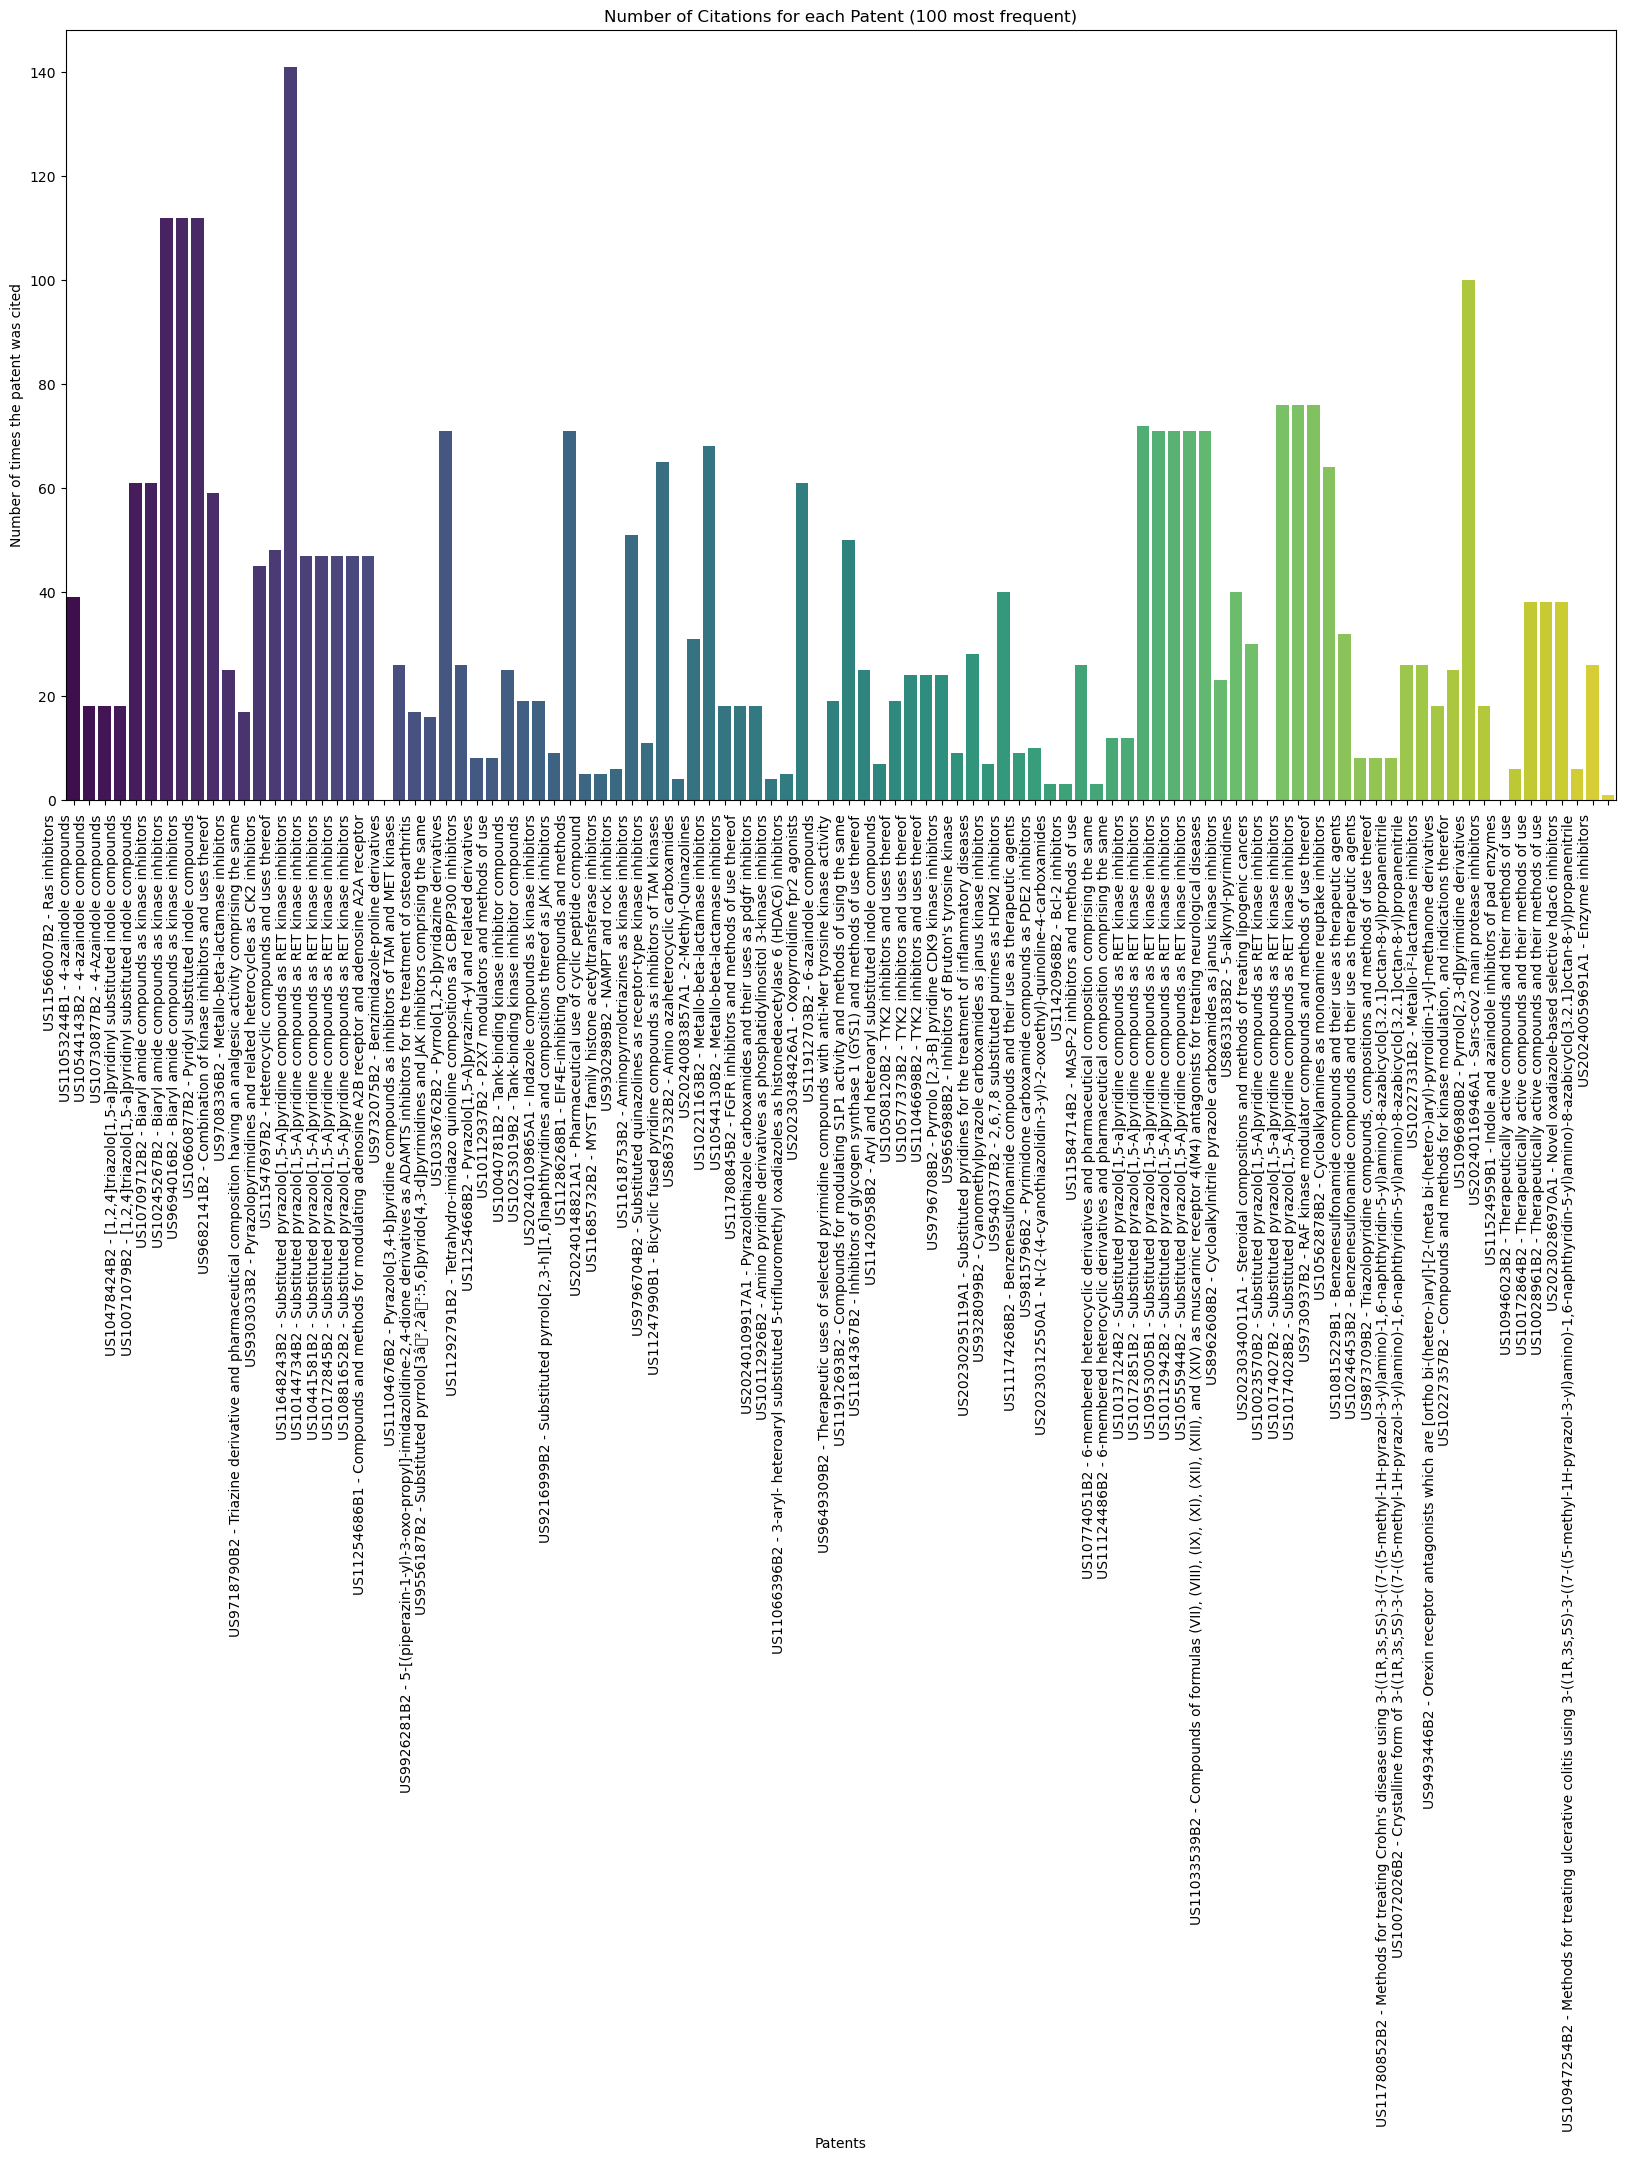

In [13]:
cleaned_patents = [patent for patent in patent_info if patent is not None]
citations = [
    int(patent["cited by"]) + int(patent["families citing"])
    for patent in cleaned_patents
    if "cited by" in patent and "families citing" in patent
]
patent_name = [
    patent["title"].replace(" - Google Patents", "")
    for patent in cleaned_patents
    if "title" in patent
]

data_citations = pd.DataFrame({"Patent": patent_name, "Cited By": citations})
plt.figure(figsize=(20, 10))
sns.barplot(x="Patent", y="Cited By", data=data_citations, palette="viridis")
plt.title("Number of Citations for each Patent (100 most frequent)")
plt.xlabel("Patents")
plt.ylabel("Number of times the patent was cited")
plt.xticks(rotation=90, ha="right")
plt.show()